In [71]:
# NN from a csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Step 1: Load the Data
url = "https://www.kaggle.com/c/digit-recognizer/data?select=train.csv"
data = pd.read_csv("./data/train.csv")

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Step 2: Preprocess the Data
# Separate features and labels
X = data.drop("label", axis="columns").values # Drop label column to get features
Y = data["label"].values # Get labels

# Normalize pixel values to range [0, 1] | i get the maximum value of X with this: X.max()
X = X / 255.0

In [58]:
# Step 3: Define Neural Network Architecture (with one hidden layer)
def initialize_parameters(input_size, hidden_size, output_size):
    w1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    w2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return w1, b1, w2, b2

# Define sizes
input_size = 784  # Each image is 28x28 pixels flattened (28*28=784)
hidden_size = 128
output_size = 10 # Digits from 0 to 9 (10 classes)

W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

In [54]:
# Step 4: Implement Forward Pass
def ReLU(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = ReLU(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    return a2 , a1

In [65]:
# Step 5: Implement Backpropagation
# Next, we will implement backpropagation to update weights based on loss.
def categorical_cross_entropy(Y_true, Y_pred):
    num_samples = len(Y_true)
    # Create one-hot encoding for true labels
    Y_true_one_hot = np.zeros((num_samples, output_size))
    Y_true_one_hot[np.arange(num_samples), Y_true] = 1
    # Calculate cross-entropy loss
    return -np.sum(Y_true_one_hot * np.log(Y_pred + 1e-15)) / num_samples

def backpropagation(X, Y_true, Y_pred, a1):
    num_samples = len(Y_true)
    
    # Calculate gradients for output layer
    dZ2 = Y_pred - one_hot_encode(Y_true)
    dW2 = np.dot(a1.T, dZ2) / num_samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / num_samples

    # Calculate gradients for hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (a1 > 0)
    dW1 = np.dot(X.T, dZ1) / num_samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / num_samples

    return dW1, db1, dW2, db2

def one_hot_encode(Y_true): # we can implement it inside of backpropagation function
    num_samples = len(Y_true)
    Y_one_hot = np.zeros((num_samples, output_size))
    Y_one_hot[np.arange(num_samples), Y_true] = 1
    return Y_one_hot

Epoch: 0, Loss: 2.1088
Epoch: 10, Loss: 2.0945
Epoch: 20, Loss: 2.0795
Epoch: 30, Loss: 2.0637
Epoch: 40, Loss: 2.0472
Epoch: 50, Loss: 2.0298
Epoch: 60, Loss: 2.0116
Epoch: 70, Loss: 1.9927
Epoch: 80, Loss: 1.9729
Epoch: 90, Loss: 1.9524


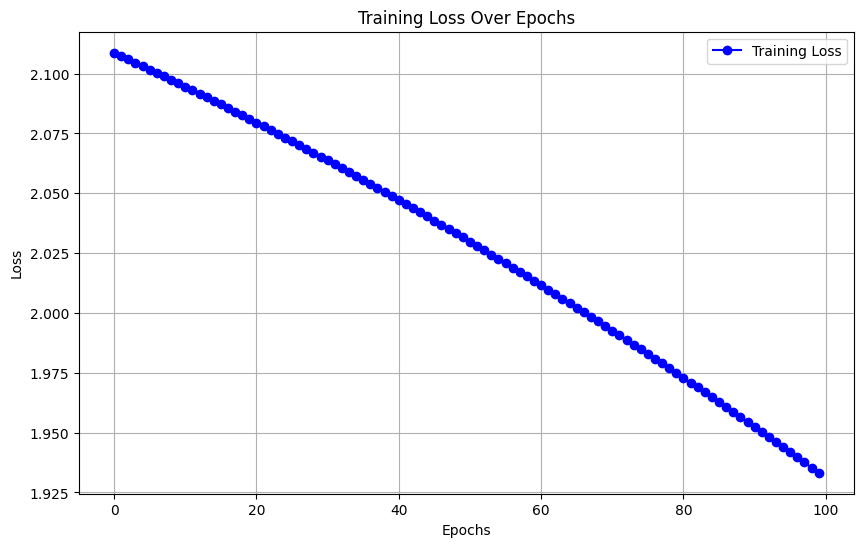

In [69]:
# Step 6: Train the Model
# Learning Rate and Training Parameters
learning_rate = 0.01
num_epochs = 100
losses = [] # to store loss values

for epoch in range(num_epochs):
    # Forward pass
    predictions, a1 = forward_pass(X)
    #Calculate loss
    loss = categorical_cross_entropy(Y, predictions)
    losses.append(loss) # Append loss for each epoch
    # Backpropagation to get gradients
    dW1, db1, dW2, db2 = backpropagation(X, Y, predictions, a1)
    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 10 ==0:
        print(f"Epoch: {epoch}, Loss: {loss:.4f}")

# plotting training loss
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses, marker="o", color="b", label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

Enter a digit (0-9):  2


Input Digit: 2, Predicted Digit: 0


/tmp/ipykernel_37688/1683007345.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img_array = np.array(img)  # Convert to numpy array


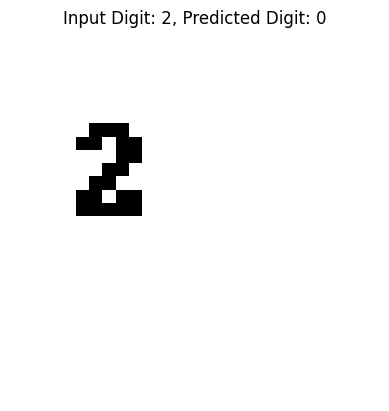

In [79]:
# Function to predict new images
def predict_new_image(image, W1, b1, W2, b2):
    # Normalize the image !!!!!!!!!
    image = image / 255.0
    image = image.reshape(1, -1) # Reshape to match input shape
    # Forward Pass
    z1 = np.dot(image, W1) + b1
    a1 = ReLU(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    predicted_class = np.argmax(a2, axis=1) # Get the index of the max probability !!!!!!!!!!!
    return predicted_class[0], a2 # Return predicted class and probabilities

# Function to create an image of the digit
def create_digit_image(digit):
    img = Image.new("L", (28, 28), color=255) # Create a white image
    draw = ImageDraw.Draw(img)

    # Draw the digit in black on the white background
    draw.text((5, 5), str(digit), fill=0)

    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array.flatten()  # Flatten the array (28*28=784)

    return img_array

# Input your own number (e.g., 8)
input_number = int(input("Enter a digit (0-9): "))  # User input for digit
new_image = create_digit_image(input_number)
predicted_class, probabilities = predict_new_image(new_image, W1, b1, W2, b2)

# Displaying the predicted digit and probabilities
print(f'Input Digit: {input_number}, Predicted Digit: {predicted_class}')
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f'Input Digit: {input_number}, Predicted Digit: {predicted_class}')
plt.axis('off')
plt.show()